In [23]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import sys
from salt_pepper_m import salt_pepper
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]

In [24]:
# Load a color image in grayscale
img = cv2.imread('boat.jpg',0).astype(float)/255
#img = cv2.imread('boat.jpg',0)

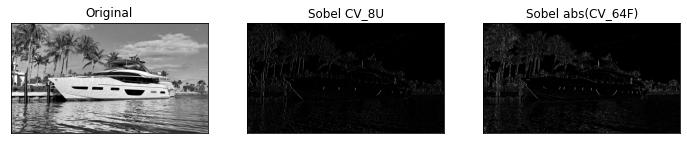

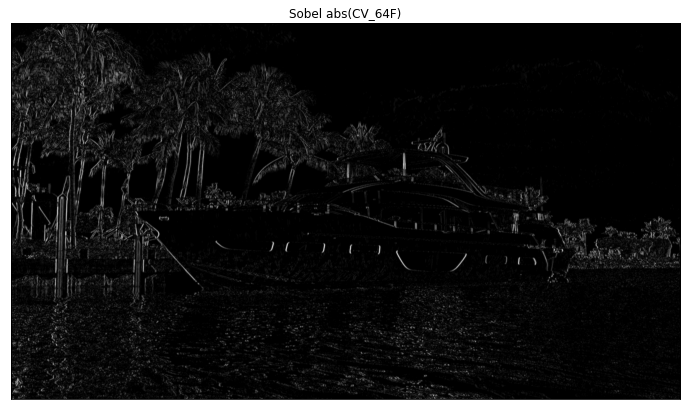

In [27]:
# Output dtype = cv.CV_8U
sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)
# Output dtype = cv.CV_64F. Then take its absolute and convert to cv.CV_8U
sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])
plt.show()

2.345098039215687


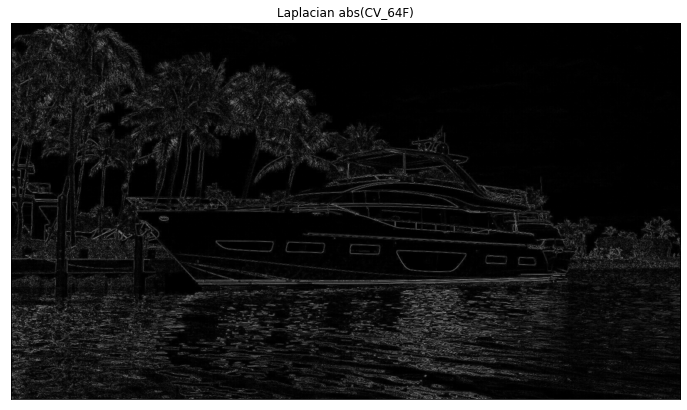

In [32]:
# Laplacian
laplacianx64f = cv2.Laplacian(img,cv2.CV_64F)
abs_laplacian64f = np.absolute(laplacianx64f)
laplacian_8u = np.uint8(abs_laplacian64f)

print(np.max(abs_laplacian64f))

plt.imshow(abs_laplacian64f,cmap = 'gray')
plt.title('Laplacian abs(CV_64F)'), plt.xticks([]), plt.yticks([])
plt.show()

0.0
0.7402739862908402


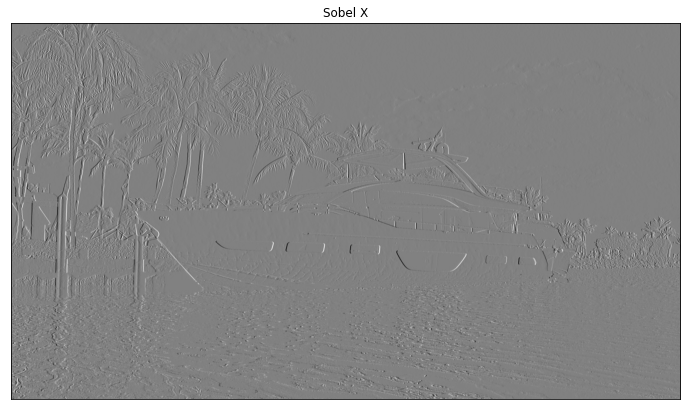

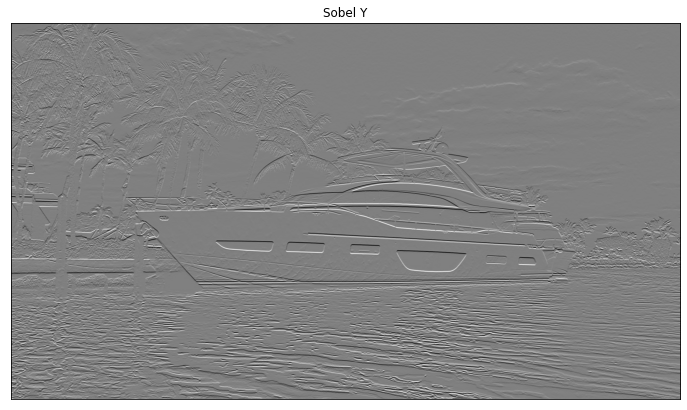

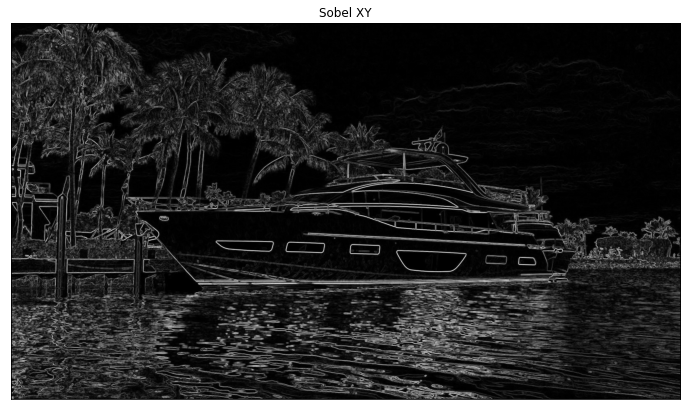

In [42]:
#Proper way as explained in videos
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)

sobelxy = np.sqrt(np.power(sobelx,2)+np.power(sobely,2))/(4*np.sqrt(2))



print(np.min(sobelxy))
print(np.max(sobelxy))

plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(sobelxy,cmap = 'gray')
plt.title('Sobel XY'), plt.xticks([]), plt.yticks([])
plt.show()

0.0
0.17625843913668915


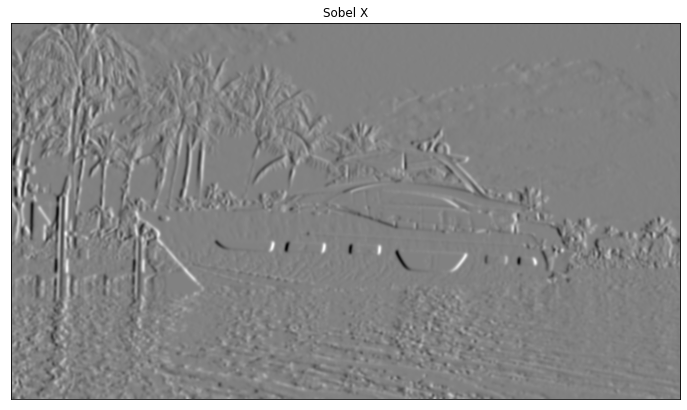

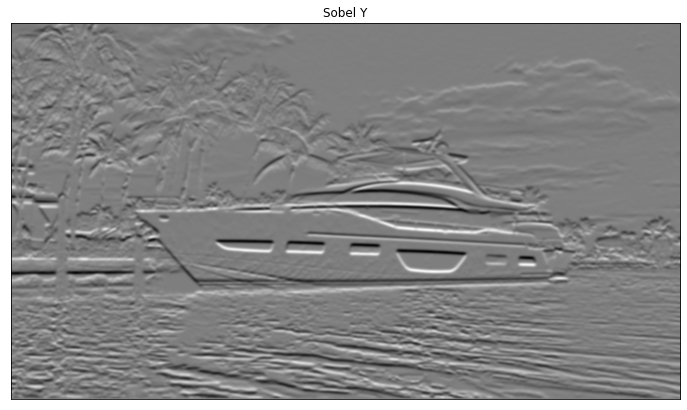

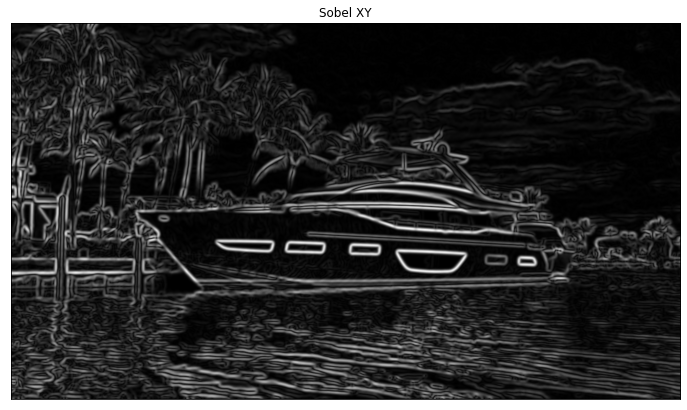

In [60]:
#With gaussian blur as well
img_blur=cv2.GaussianBlur(img,(31,31),3)
sobelx = cv2.Sobel(img_blur,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(img_blur,cv2.CV_64F,0,1,ksize=3)

sobelxy = np.sqrt(np.power(sobelx,2)+np.power(sobely,2))/(4*np.sqrt(2))



print(np.min(sobelxy))
print(np.max(sobelxy))

plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(sobelxy,cmap = 'gray')
plt.title('Sobel XY'), plt.xticks([]), plt.yticks([])
plt.show()

0.17625843913668915
0.0


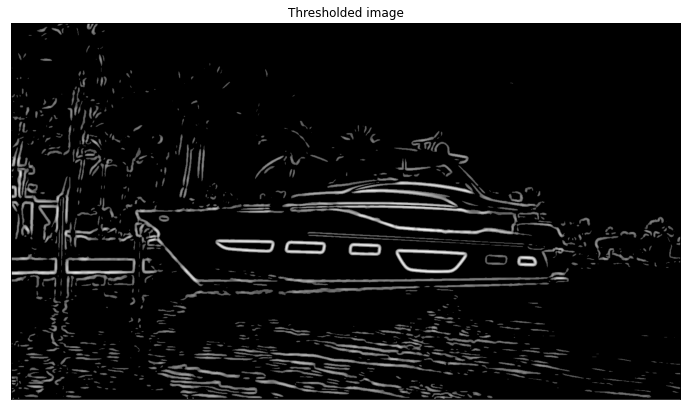

In [69]:
#Thresholding
print(np.max(sobelxy))
print(np.min(sobelxy))

thresholded=sobelxy/np.max(sobelxy)
thresh=0.3

#thresholded[thresholded>=thresh]=1
thresholded[thresholded<thresh]=0

plt.imshow(thresholded,cmap = 'gray')
plt.title('Thresholded image'), plt.xticks([]), plt.yticks([])
plt.show()

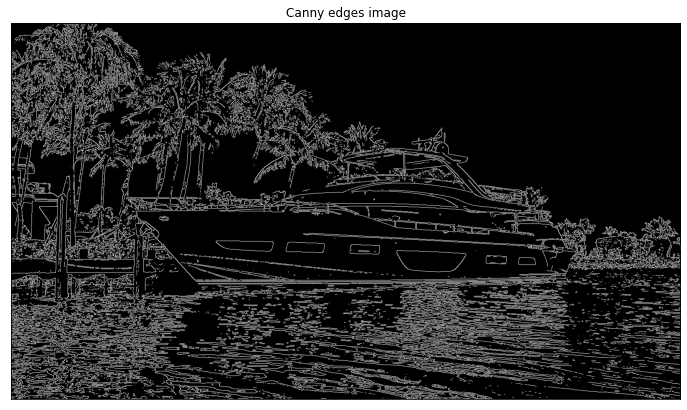

In [79]:
#Canny edge detector
img_8U=(img*255).astype(np.uint8)
edges=cv2.Canny(img_8U,230,250)

plt.imshow(edges,cmap = 'gray')
plt.title('Canny edges image'), plt.xticks([]), plt.yticks([])
plt.show()